# Intelligent Crop Recommendation System using Soil and Weather Conditions

This project is a complete machine learning pipeline starting from data exploration to model deployment

**Problem Statement**

The goal is to recommend the most suitable crop for a given soil and weather condition, ensuring higher yield and optimal resource usage.

Dataset Credit: Kaggle

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jhara\Desktop\Projects\Datasets\crop_recommendation.csv')

# Exploratory Data Analysis

In [2]:
print(df.shape)

(2200, 8)


In [3]:
print(df.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [4]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Outlier Detection

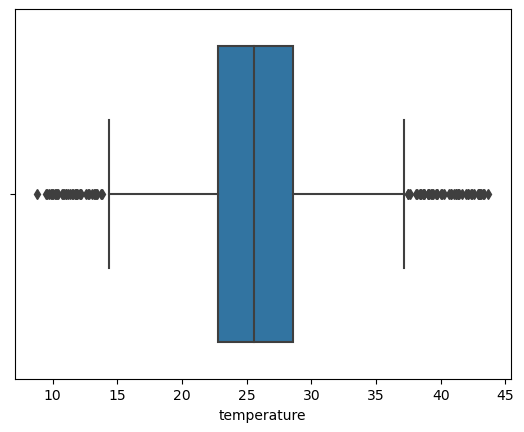

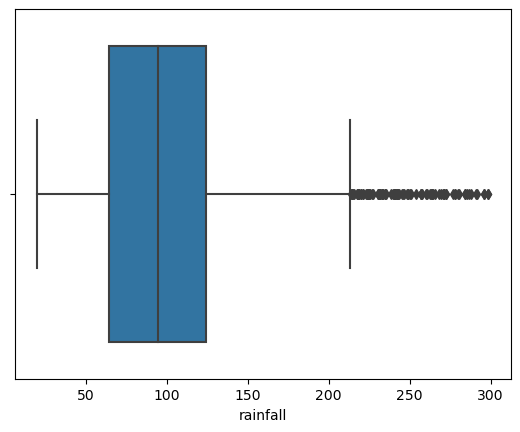

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['temperature'])
plt.show()

sns.boxplot(x=df['rainfall'])
plt.show()

IQR for Outliers


In [6]:
Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)

IQR = Q3-Q1

LowerBound = Q1-1.5*IQR
UpperBound = Q3+1.5*IQR

outliers = df[(df['temperature'] < LowerBound) | (df['temperature'] > UpperBound)]

print('Outliers in temperature')

print(outliers)

Outliers in temperature
       N    P    K  temperature   humidity        ph    rainfall   label
1203  36  125  196    37.465668  80.659687  6.155261   66.838723  grapes
1205   2  123  198    39.648519  82.210799  6.253035   70.399061  grapes
1207  11  122  195    12.141907  83.568125  5.647202   69.631220  grapes
1208   6  123  203    12.756796  81.624974  6.130310   66.778446  grapes
1209  17  134  204    39.040720  80.183933  6.499605   73.884670  grapes
...   ..  ...  ...          ...        ...       ...         ...     ...
1786  69   66   49    40.004391  90.170158  6.527110   92.118774  papaya
1791  56   65   45    38.201682  93.973800  6.751299  218.090881  papaya
1795  42   59   55    40.102077  94.351102  6.979102  149.119999  papaya
1796  43   64   47    38.589545  91.580765  6.825665  102.270823  papaya
1797  35   67   49    41.313301  91.150880  6.617067  239.742755  papaya

[86 rows x 8 columns]


In [7]:
df['temperature'] = df['temperature'].clip(LowerBound, UpperBound)

In [8]:
Q1 = df['rainfall'].quantile(0.25)
Q3 = df['rainfall'].quantile(0.75)

IQR = Q3-Q1

LowerBound = Q1-1.5*IQR
UpperBound = Q3+1.5*IQR

outliers = df[(df['rainfall'] < LowerBound) | (df['rainfall'] > UpperBound)]

print('Outliers in rainfall')

print(outliers)

Outliers in rainfall
       N   P   K  temperature   humidity        ph    rainfall    label
1     85  58  41    21.770462  80.319644  7.038096  226.655537     rice
2     60  55  44    23.004459  82.320763  7.840207  263.964248     rice
3     74  35  40    26.491096  80.158363  6.980401  242.864034     rice
4     78  42  42    20.130175  81.604873  7.628473  262.717340     rice
5     69  37  42    23.058049  83.370118  7.073454  251.055000     rice
...   ..  ..  ..          ...        ...       ...         ...      ...
1867   3  23  30    29.701432  95.657544  6.078807  215.196804  coconut
1881  19  30  30    29.565492  91.408963  5.826381  224.831573  coconut
1886   8  15  33    28.973187  98.098610  5.501580  213.901102  coconut
1892   3   9  35    26.916419  99.846716  6.318553  225.632366  coconut
1894  27   8  30    26.446001  98.299378  6.008386  221.225817  coconut

[100 rows x 8 columns]


In [9]:
df['rainfall'] = df['rainfall'].clip(LowerBound, UpperBound)

Univariate Analysis

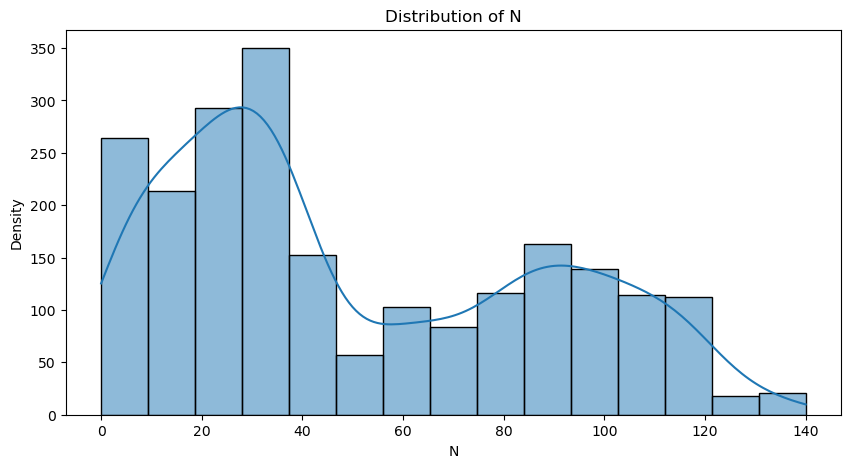

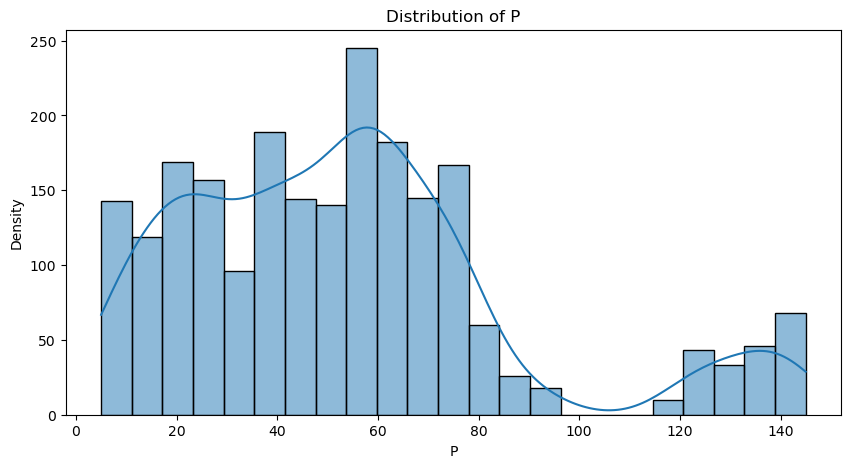

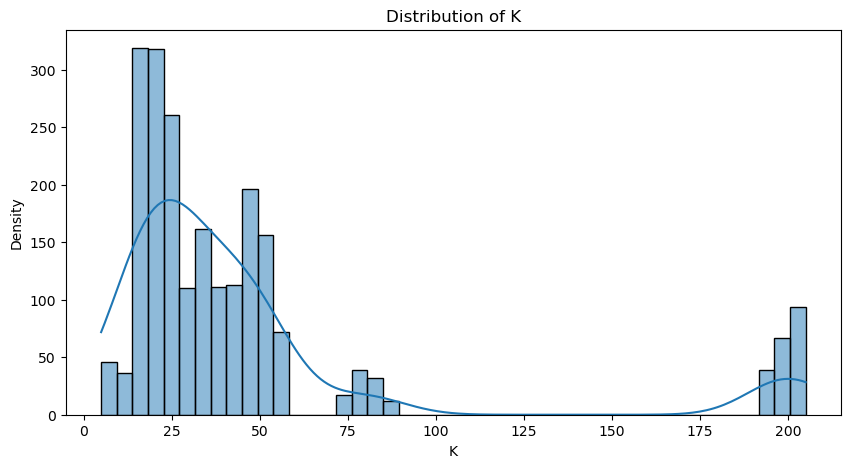

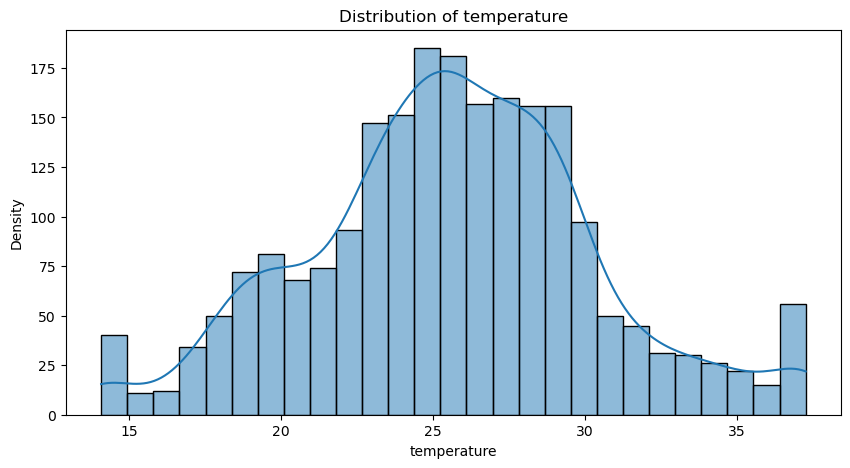

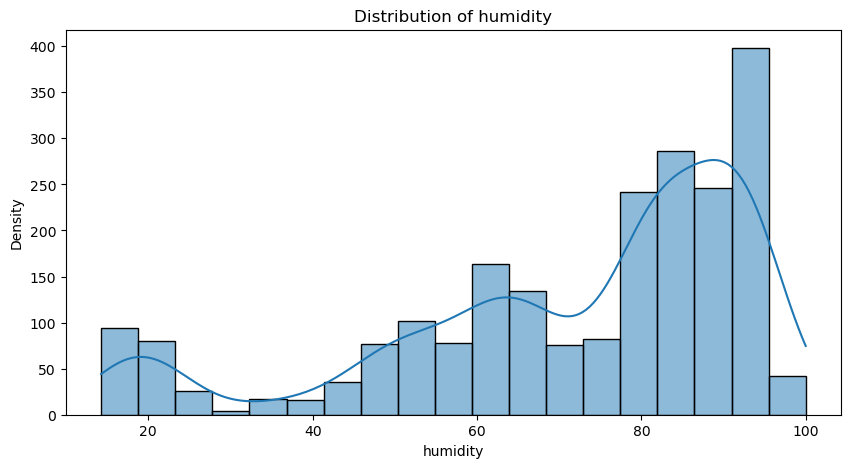

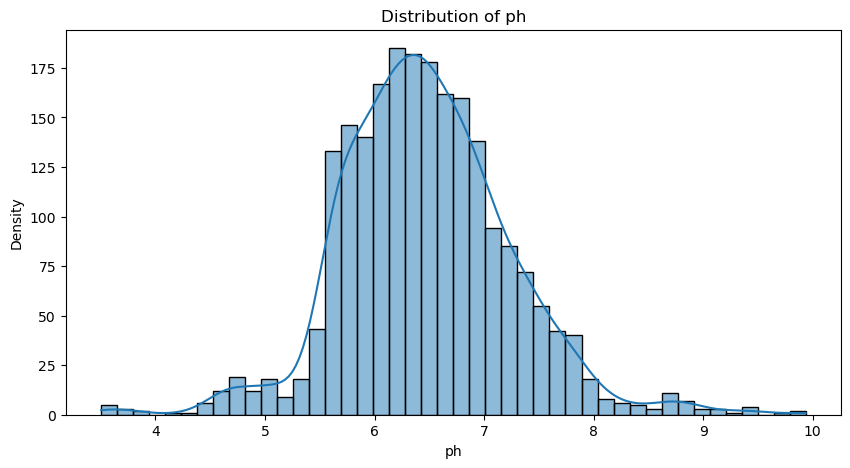

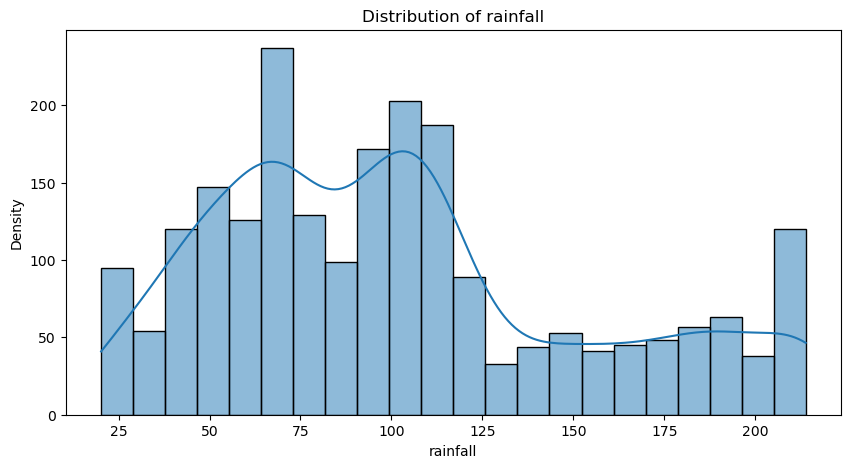

In [10]:
# List of continuous features
continuous_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Loop through each continuous feature
for feature in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


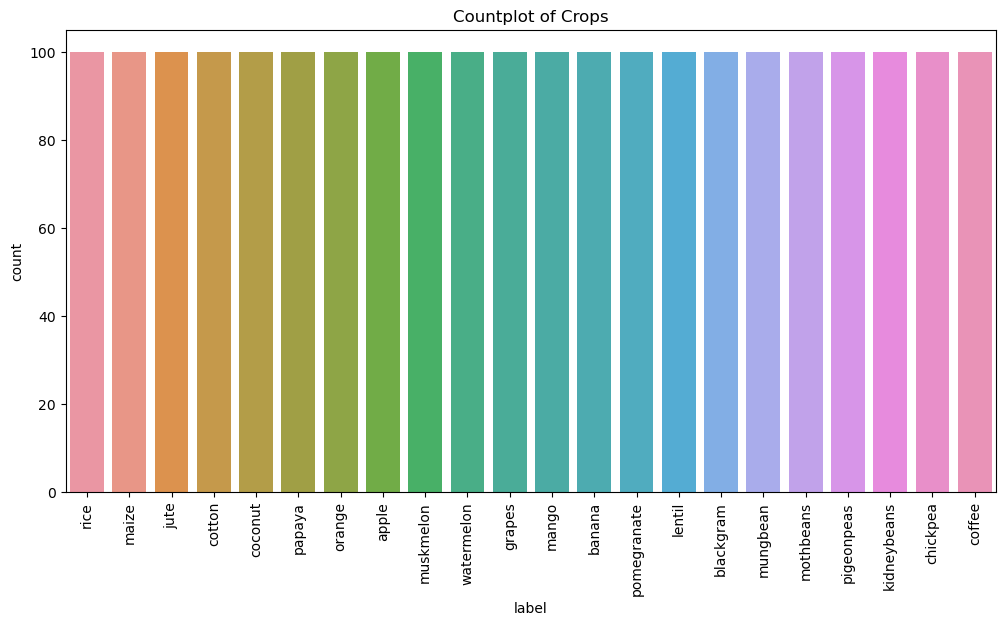

In [11]:
# Countplot for categorical feature
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot of Crops')
plt.show()

Multivariate Analysis


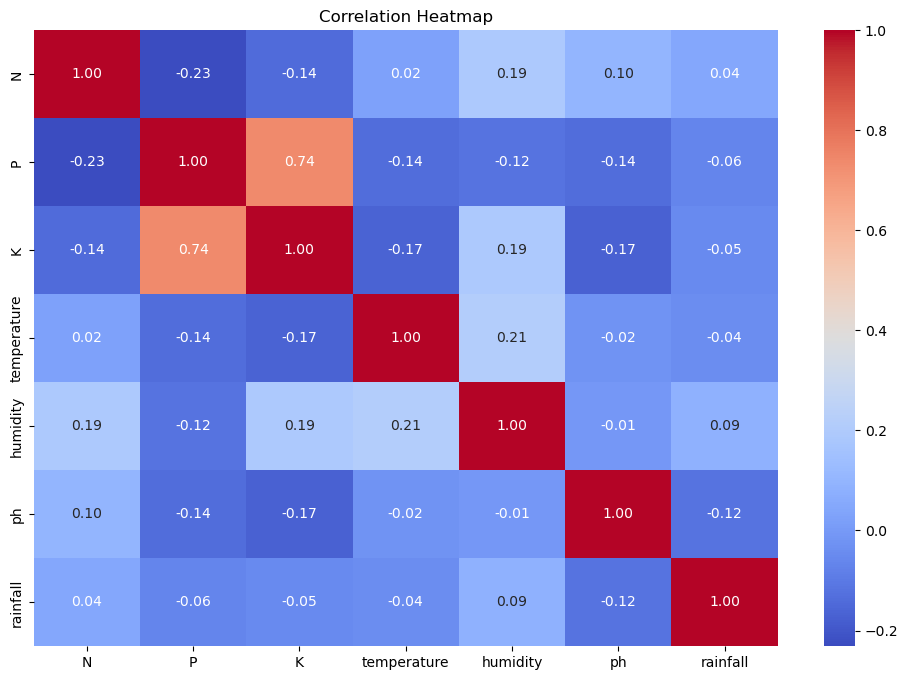

In [12]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation heatmap
plt.figure(figsize=(12, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



P and K (Correlation = 0.74):

There's a strong positive correlation between Phosphorus (P) and Potassium (K). This means they often increase together. You might consider dropping one of them to reduce redundancy in your model.

However, I am not dropping it.

C:\Users\jhara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


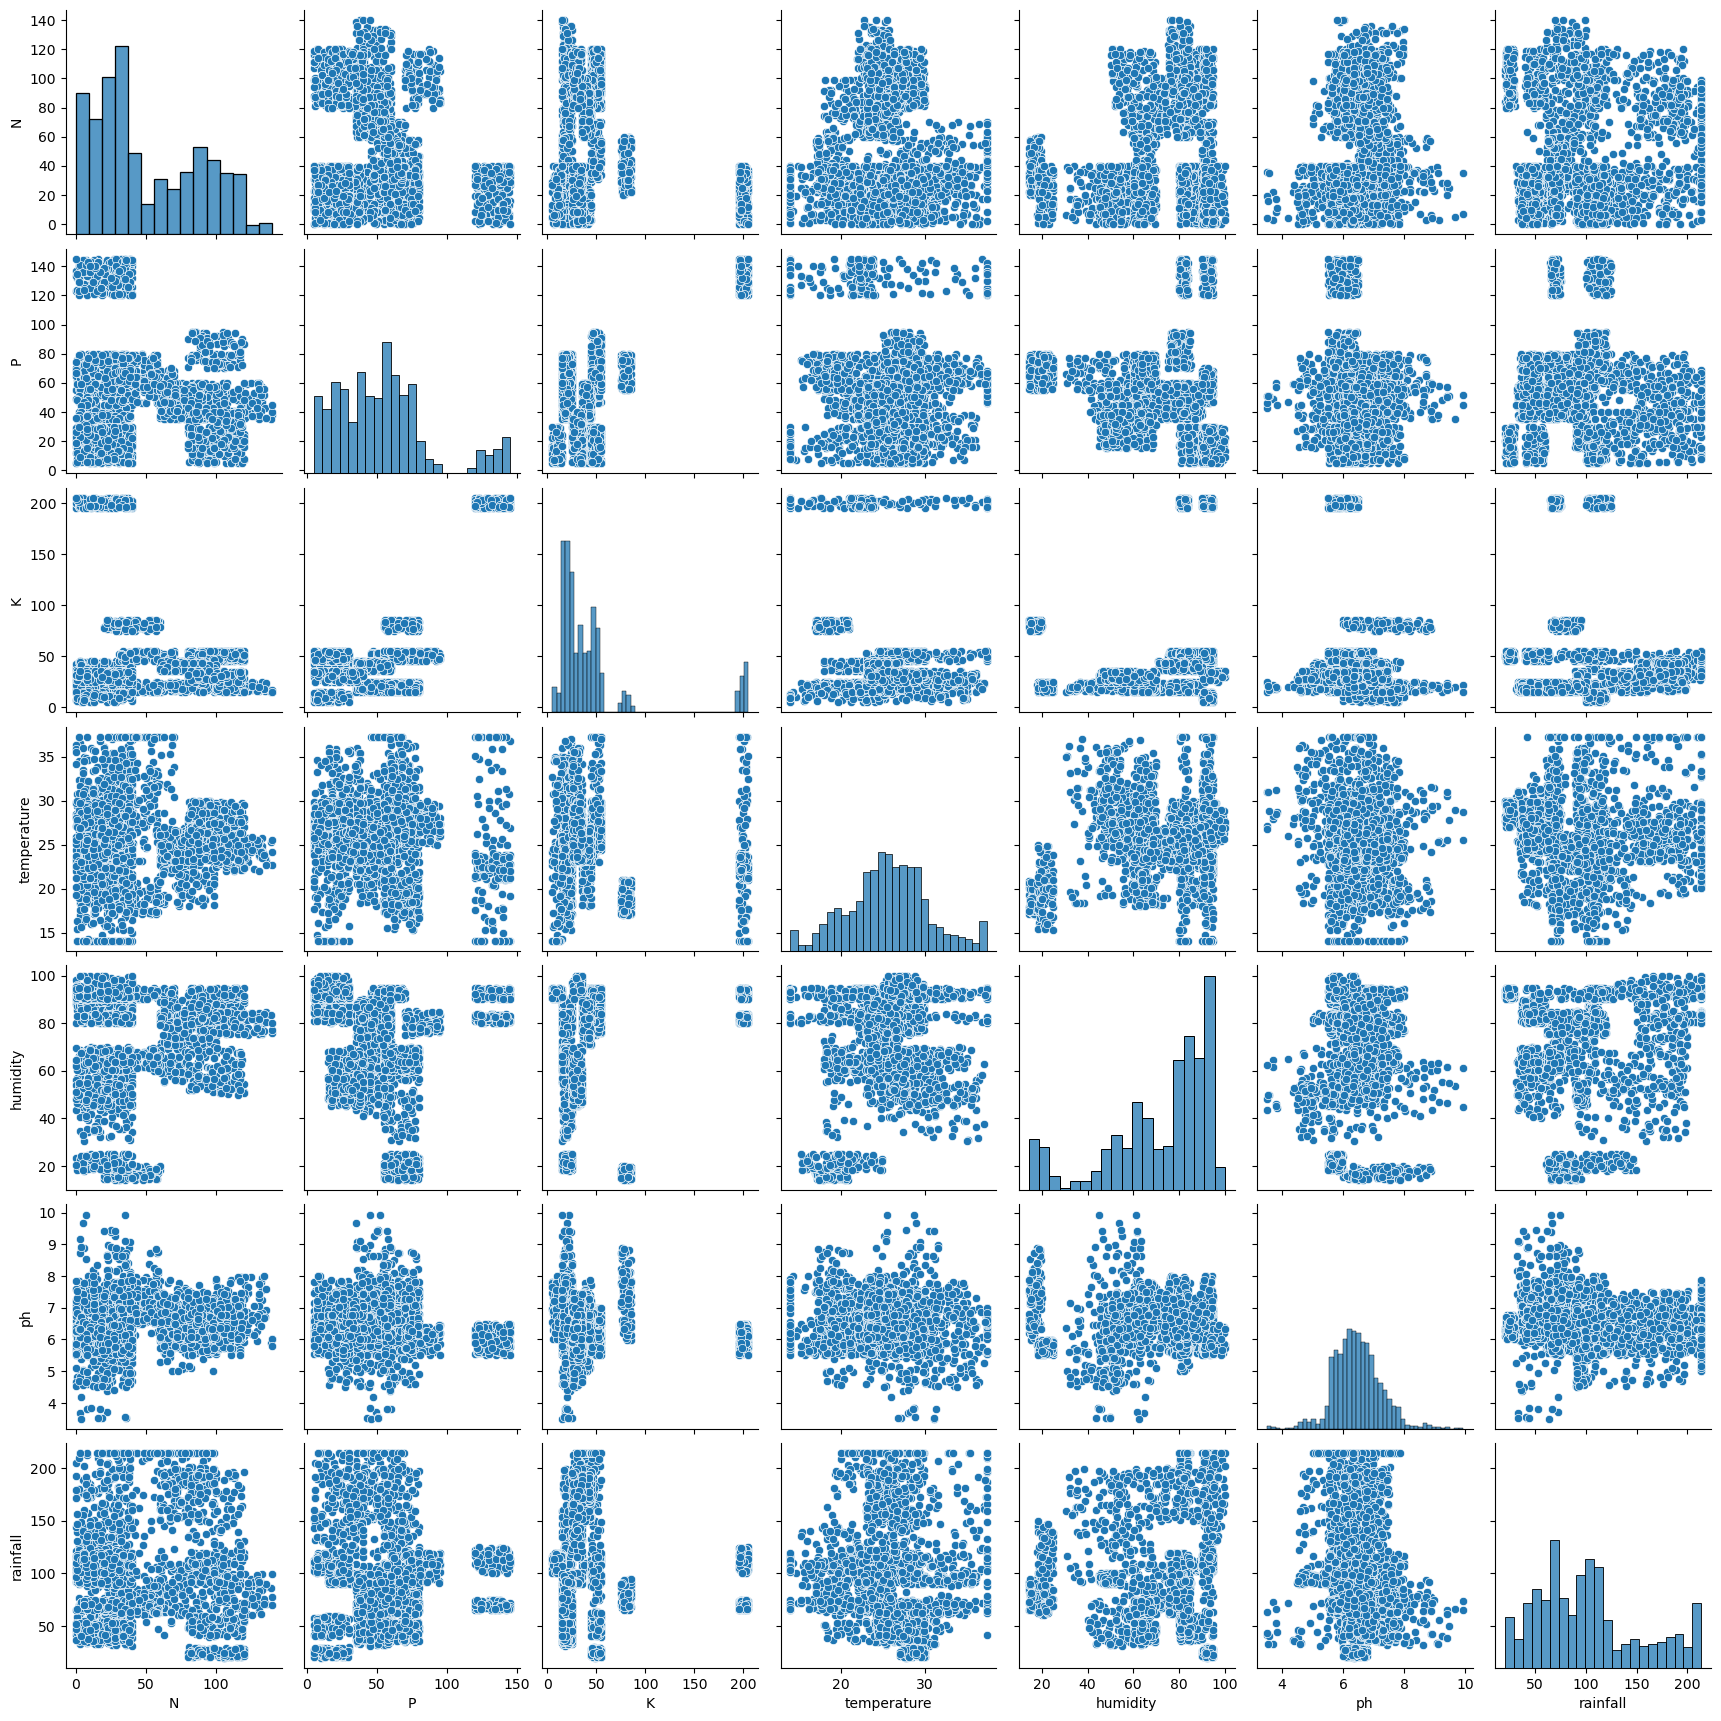

In [13]:
# Pair Plot
sns.pairplot(numeric_df)
plt.show()

# Feature Engineering


Seasonal Classification


In [14]:
def classify_season(temp, rainfall):
    if temp >= 25 and rainfall >= 200:
        return 'Monsoon'
    elif temp < 20 and rainfall < 50:
        return 'Winter'
    else:
        return 'Summer'

# Apply the function to the dataset
df['season'] = df.apply(lambda row: classify_season(row['temperature'], row['rainfall']), axis=1)

# Display the first few rows to verify
print(df[['temperature', 'rainfall', 'season']].head())


   temperature    rainfall   season
0    20.879744  202.935536   Summer
1    21.770462  213.841241   Summer
2    23.004459  213.841241   Summer
3    26.491096  213.841241  Monsoon
4    20.130175  213.841241   Summer


Soil type classification

In [15]:
# Function to classify soil type based on pH levels
def classify_soil_type(ph):
    if ph < 6:
        return 'Acidic'
    elif 6 <= ph <= 7:
        return 'Neutral'
    else:
        return 'Alkaline'

# Apply the function to the dataset
df['soil_type'] = df['ph'].apply(classify_soil_type)

# Display the first few rows to verify
print(df[['ph', 'soil_type']].head())


         ph soil_type
0  6.502985   Neutral
1  7.038096  Alkaline
2  7.840207  Alkaline
3  6.980401   Neutral
4  7.628473  Alkaline


Interaction features and Scaling


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Create interaction features
df['N_P_ratio'] = df['N'] / (df['P'] + 1e-6) 
df['K_Temp_ratio'] = df['K'] / (df['temperature'] + 1e-6)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select numerical columns to scale
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N_P_ratio', 'K_Temp_ratio']

# Apply scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to verify
print(df.head())


          N         P      K  temperature  humidity        ph  rainfall label  \
0  0.642857  0.264286  0.190     0.293442  0.790267  0.466264  0.943678  rice   
1  0.607143  0.378571  0.180     0.331886  0.770633  0.549480  1.000000  rice   
2  0.428571  0.357143  0.195     0.385146  0.793977  0.674219  1.000000  rice   
3  0.528571  0.214286  0.175     0.535633  0.768751  0.540508  1.000000  rice   
4  0.557143  0.264286  0.185     0.261090  0.785626  0.641291  1.000000  rice   

    season soil_type  N_P_ratio  K_Temp_ratio  
0   Summer   Neutral   0.090036      0.132348  
1   Summer  Alkaline   0.061576      0.120122  
2   Summer  Alkaline   0.045837      0.122162  
3  Monsoon   Neutral   0.088836      0.094206  
4   Summer  Alkaline   0.078031      0.134223  


Why N/P Ratio?
Nitrogen (N) and Phosphorus (P) are primary macronutrients essential for plant growth.
Plants need Nitrogen for leafy growth and Phosphorus for root and flower development.
An imbalance between N and P can harm plant growth. For example:
Too much Nitrogen: Promotes leafy growth but reduces fruit and flower production.
Too much Phosphorus: Can inhibit the uptake of other nutrients.
Therefore, the N/P Ratio is a critical indicator of soil health and fertility.

Why K/Temperature Ratio?
Potassium (K) is important for regulating a plant’s response to temperature stress and water regulation.
High temperatures increase a plant's need for Potassium to manage stomatal function (opening and closing of leaf pores) and photosynthesis efficiency.
The K/Temperature Ratio helps the model understand how Potassium needs change based on weather conditions

# Data Preprocessing


In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode the crop labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Display the mapping of crops to numerical values
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [18]:
# Encode categorical features
df = pd.get_dummies(df, columns=['season', 'soil_type'], drop_first=False)

# Display the first few rows
print(df.head())


          N         P      K  temperature  humidity        ph  rainfall  \
0  0.642857  0.264286  0.190     0.293442  0.790267  0.466264  0.943678   
1  0.607143  0.378571  0.180     0.331886  0.770633  0.549480  1.000000   
2  0.428571  0.357143  0.195     0.385146  0.793977  0.674219  1.000000   
3  0.528571  0.214286  0.175     0.535633  0.768751  0.540508  1.000000   
4  0.557143  0.264286  0.185     0.261090  0.785626  0.641291  1.000000   

   label  N_P_ratio  K_Temp_ratio  season_Monsoon  season_Summer  \
0     20   0.090036      0.132348           False           True   
1     20   0.061576      0.120122           False           True   
2     20   0.045837      0.122162           False           True   
3     20   0.088836      0.094206            True          False   
4     20   0.078031      0.134223           False           True   

   season_Winter  soil_type_Acidic  soil_type_Alkaline  soil_type_Neutral  
0          False             False               False          

Data Split to training and Testing set

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (1760, 15)
Testing set shape: (440, 15)


I've KNN, you can use other models as well

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.3f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.970
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       0.95      1.00      0.98        20
          10       0.69      1.00      0.81        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       0.95      0.88      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

In [37]:
# Training accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.3f}")

# Test accuracy (already calculated)
print(f"Test Accuracy: {knn_accuracy:.3f}")


Training Accuracy: 0.990
Test Accuracy: 0.970


Hyperparameter Tuning and Cross Validation

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}

# Initialize KNN
knn = KNeighborsClassifier()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict on the test set using the best model
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluate
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'n_neighbors': 3}
Best Cross-Validation Accuracy: 0.9823863636363637

Test Accuracy: 0.9727272727272728

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      0.96      0.92        23
           9       0.95      1.00      0.98        20
          10       0.69      1.00      0.81        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.83      0.91        24
          14       1.00      1.00      1.00

In [39]:
# Get the best model from GridSearchCV
best_knn = grid_search.best_estimator_

# Calculate training accuracy
y_train_pred = best_knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy (KNN After Tuning): {train_accuracy:.3f}")

# Calculate test accuracy
y_test_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (KNN After Tuning): {test_accuracy:.3f}")


Training Accuracy (KNN After Tuning): 0.992
Test Accuracy (KNN After Tuning): 0.973


Logistic Regression Model (Simpler Model)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Baseline model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred_log = log_reg.predict(X_test)

# Training accuracy
y_train_pred_log = log_reg.predict(X_train)
train_accuracy_log = accuracy_score(y_train, y_train_pred_log)
print(f"Training Accuracy (Logistic Regression): {train_accuracy_log:.3f}")

# Test accuracy
test_accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Test Accuracy (Logistic Regression): {test_accuracy_log:.3f}")

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))


Training Accuracy (Logistic Regression): 0.944
Test Accuracy (Logistic Regression): 0.923

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.98        21
           2       0.90      0.95      0.93        20
           3       1.00      0.96      0.98        26
           4       1.00      0.93      0.96        27
           5       0.94      1.00      0.97        17
           6       1.00      0.94      0.97        17
           7       1.00      1.00      1.00        14
           8       0.73      0.96      0.83        23
           9       0.95      0.95      0.95        20
          10       0.61      1.00      0.76        11
          11       1.00      1.00      1.00        21
          12       0.83      1.00      0.90        19
          13       0.94      0.67      0.78        24
          14       0.85      0.89      0.87        19

In [46]:
import joblib

# Save the best KNN model to a file
joblib.dump(best_knn, 'knn_model.pkl')


['knn_model.pkl']

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\Users\jhara\Desktop\Projects\Datasets\crop_recommendation.csv')

# Print the column names
print(df.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
